In [2]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
from configure.settings import DBSelector

In [4]:
db = DBSelector().mongo('qq')

In [26]:
new_stock_info =[]
for item in db['db_stock']['hk_new_stock'].find():
    del item['_id']
    new_stock_info.append(item)

In [8]:
new_stock_info[0]

{'stock_code': '02170',
 'stock_name': '贝康医疗－Ｂ',
 'winning_rate_substr': '200',
 'crawltime': datetime.datetime(2021, 2, 16, 23, 22, 5, 595000),
 '保荐机构': '中信里昂证券资本市场',
 '发行定价': '27.360',
 '发行市值': '72.96亿',
 '回拨比例': '50.0000',
 '是否有基石': '有',
 '是否有绿鞋': None,
 '暗盘涨幅': '14.04',
 '稳中一手': '200/1',
 '累计涨幅': '-0.40',
 '行业': '医疗保健',
 '首日涨幅': '1.24',
 '上市日期': '2021-02-08 00:00:00',
 '申购人数': '264120',
 '超额申购倍数': 402.8,
 '一手中签率': 10}

In [27]:
df = pd.DataFrame(new_stock_info)

In [28]:
df['首日涨幅']=df['首日涨幅'].astype(np.float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   stock_code           844 non-null    object        
 1   stock_name           844 non-null    object        
 2   winning_rate_substr  843 non-null    object        
 3   crawltime            844 non-null    datetime64[ns]
 4   保荐机构                 844 non-null    object        
 5   发行定价                 844 non-null    object        
 6   发行市值                 844 non-null    object        
 7   回拨比例                 843 non-null    object        
 8   是否有基石                844 non-null    object        
 9   是否有绿鞋                668 non-null    object        
 10  暗盘涨幅                 843 non-null    object        
 11  稳中一手                 843 non-null    object        
 12  累计涨幅                 843 non-null    object        
 13  行业                   844 non-null  

In [34]:
df['暗盘涨幅']=df['暗盘涨幅'].astype(np.float)

In [61]:
df['累计涨幅']=df['累计涨幅'].astype(np.float)

In [31]:
df['暗盘涨幅']=df['暗盘涨幅'].replace('--','0')

In [33]:
df.head()

,stock_code,stock_name,winning_rate_substr,crawltime,保荐机构,发行定价,发行市值,回拨比例,是否有基石,是否有绿鞋,暗盘涨幅,稳中一手,累计涨幅,行业,首日涨幅,上市日期,申购人数,超额申购倍数,一手中签率
0,02170,贝康医疗－Ｂ,200,2021-02-16 23:22:05.595,中信里昂证券资本市场,27.360,72.96亿,50.0000,有,None,14.04,200/1,-0.40,医疗保健,1.24,2021-02-08 00:00:00,264120,402.80,10.00
1,01024,快手－Ｗ,500,2021-02-16 23:22:05.595,"摩根士丹利亚洲,美林远东,华兴证券(香港)",115.000,4724.42亿,6.0000,有,None,170.09,500/1,250.43,软件服务,160.87,2021-02-05 00:00:00,1422977,1204.16,4.00
2,02161,健倍苗苗,100,2021-02-16 23:22:05.595,中国银河国际证券(香港),1.200,10.72亿,无,无,None,14.17,100/1,100.00,医疗保健,80.00,2021-02-05 00:00:00,87981,22.47,8.00
3,02160,心通医疗－Ｂ,400,2021-02-16 23:22:05.595,"摩根大通证券(远东),花旗环球金融亚洲,中国国际金融香港证券",12.200,288.67亿,50.0000,无,None,65.57,400/1,61.31,医疗保健,54.26,2021-02-04 00:00:00,567475,769.00,7.50
4,06668,星盛商业,100,2021-02-16 23:22:05.595,"建银国际金融,中信建投(国际)融资",3.860,38.60亿,50.0000,有,None,21.50,100/1,0.26,居民服务,3.63,2021-01-26 00:00:00,331495,756.85,1.29


In [62]:
industry_list =[]
for industry,sub_df in df.groupby('行业'):
    industry_dict ={}
    industry_dict['industry']=industry
    industry_dict['首日涨幅均值']= round(sub_df['首日涨幅'].mean(),2)
    industry_dict['行业个数']= len(sub_df)
    industry_dict['首日涨幅波动率']= round(sub_df['首日涨幅'].std(),2)
    industry_dict['首日涨幅最大']= round(sub_df['首日涨幅'].max(),2)
    industry_dict['首日涨幅最小']= round(sub_df['首日涨幅'].min(),2)
    industry_dict['累计涨幅均值']= round(sub_df['累计涨幅'].mean(),2)

    industry_list.append(industry_dict)



In [63]:
sorted_result = list(sorted(industry_list,key=lambda x:x.get('首日涨幅均值'),reverse=True))

In [64]:
df1= pd.DataFrame(sorted_result)

In [67]:
df1.to_excel('hk_new_stock.xls',encoding='utf8')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   stock_code           844 non-null    object        
 1   stock_name           844 non-null    object        
 2   winning_rate_substr  843 non-null    object        
 3   crawltime            844 non-null    datetime64[ns]
 4   保荐机构                 844 non-null    object        
 5   发行定价                 844 non-null    object        
 6   发行市值                 844 non-null    object        
 7   回拨比例                 843 non-null    object        
 8   是否有基石                844 non-null    object        
 9   是否有绿鞋                668 non-null    object        
 10  暗盘涨幅                 843 non-null    float64       
 11  稳中一手                 843 non-null    object        
 12  累计涨幅                 843 non-null    float64       
 13  行业                   844 non-null  

In [69]:
df.describe()

,暗盘涨幅,累计涨幅,首日涨幅,超额申购倍数,一手中签率
count,843.000000,843.000000,843.000000,843.000000,843.000000
mean,13.731625,3.930486,14.100344,139.656892,62.150629
std,32.942431,117.044810,41.670514,380.552028,36.072675
min,-42.500000,-97.550000,-56.880000,0.030000,0.430000
25%,-0.885000,-52.040000,-2.640000,3.440000,26.560000
50%,4.170000,-19.940000,2.670000,14.790000,60.070000
75%,18.825000,11.680000,16.835000,81.610000,100.000000
max,575.000000,1496.970000,431.670000,6289.000000,100.000000


In [71]:
df.iloc[df['暗盘涨幅'].argmax()]

stock_code                                  01716
stock_name                                   毛记葵涌
winning_rate_substr                          1000
crawltime              2021-02-16 23:22:08.423000
保荐机构                                         长雄证券
发行定价                                         1.20
发行市值                                        3.24亿
回拨比例                                           50
是否有基石                                           无
是否有绿鞋                                           无
暗盘涨幅                                          575
稳中一手                                       1000/1
累计涨幅                                       -23.33
行业                                           影视传媒
首日涨幅                                       431.67
上市日期                          2018-03-28 00:00:00
申购人数                                       143001
超额申购倍数                                       6289
一手中签率                                         0.8
Name: 469, dtype: object

In [72]:
df.iloc[df['暗盘涨幅'].argmin()]

stock_code                                  01957
stock_name                               MBV INTL
winning_rate_substr                             5
crawltime              2021-02-16 23:22:06.293000
保荐机构                                         南华融资
发行定价                                        0.800
发行市值                                        5.02亿
回拨比例                                           30
是否有基石                                           无
是否有绿鞋                                           有
暗盘涨幅                                        -42.5
稳中一手                                          5/1
累计涨幅                                          -60
行业                                           纺织服饰
首日涨幅                                       -56.88
上市日期                          2020-07-08 00:00:00
申购人数                                        14348
超额申购倍数                                       23.5
一手中签率                                       65.01
Name: 98, dtype: object

In [73]:
df_normal = df1[df1['行业个数']>2]

In [77]:
df_normal.head(10).to_excel('top10.xls')

In [78]:
df_normal.tail(10).to_excel('last10.xls')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   stock_code           844 non-null    object        
 1   stock_name           844 non-null    object        
 2   winning_rate_substr  843 non-null    object        
 3   crawltime            844 non-null    datetime64[ns]
 4   保荐机构                 844 non-null    object        
 5   发行定价                 844 non-null    object        
 6   发行市值                 844 non-null    object        
 7   回拨比例                 843 non-null    object        
 8   是否有基石                844 non-null    object        
 9   是否有绿鞋                668 non-null    object        
 10  暗盘涨幅                 843 non-null    float64       
 11  稳中一手                 843 non-null    object        
 12  累计涨幅                 843 non-null    float64       
 13  行业                   844 non-null  

In [84]:
df['申购人数']=df['申购人数'].astype(np.int)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [86]:
df_people = df[~df['申购人数'].isnull()]

In [87]:
len(df)

844

In [88]:
len(df_people)

843

In [89]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

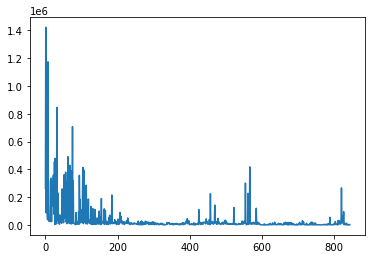

In [91]:
df_people['申购人数']=df_people['申购人数'].astype(np.int)
df_people['申购人数'].plot()

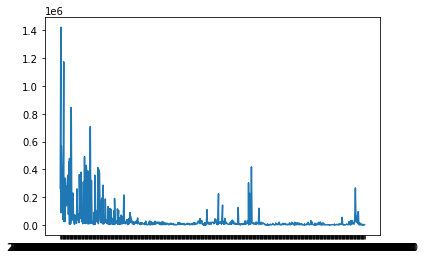

In [92]:
plt.plot(df_people['上市日期'],df_people['申购人数'])

In [5]:
new_stock_info_ =[]
for item in db['db_stock']['hk_new_stock'].find({'stock_name':{'$regex':'Ｓ'}}):
    del item['_id']
    new_stock_info_.append(item)

In [7]:
len(new_stock_info_)

0

In [6]:
df=pd.DataFrame(new_stock_info_)

In [8]:
df=df[df['stock_code']!='01691']

In [13]:
df_selected = df[['stock_code','stock_name','暗盘涨幅','首日涨幅','申购人数','上市日期','一手中签率']]

In [14]:
df_selected.to_html('tb.html',encoding='utf8')

# 价格分布

In [3]:
db=DBSelector()

In [5]:
conn = db.get_engine('db_stock')

In [6]:
df = pd.read_sql('tb_hk_new_stock',conn)

In [7]:
df.head()

,id,name,code,issue_date,each_hand_stock,share_value_Yi,margin_price,price,over_price_part,hit_least_num,hit_ratio,current_price,first_day_raise,accumulate_raise,crawltime
0,1,森松国际,02155.HK,2021-06-28,"1,000",22.00-24.80,2.20-2.48,2.48,22.7,25,80.0,8.90,258.870,258.871,2021-06-29 09:19:36
1,2,越秀服务,06626.HK,2021-06-28,500,72.16-96.41,4.88-6.52,4.88,8.9,12,50.0,4.88,0.000,0.000,2021-06-29 09:19:36
2,3,科济药业－B,02171.HK,2021-06-18,500,167.93-186.09,29.60-32.80,32.80,433.6,70,5.0,31.70,-8.537,-3.354,2021-06-29 09:19:36
3,4,优然牧业,09858.HK,2021-06-18,"1,000",264.92-328.68,6.98-8.66,6.98,2.7,3,80.0,6.12,-11.891,-12.321,2021-06-29 09:19:36
4,5,时代天使,06699.HK,2021-06-16,200,243.74-286.85,147.00-173.00,173.00,"2,078.2",750,1.5,402.00,131.792,132.370,2021-06-29 09:19:36


In [8]:
def convert_digit(x):
    return int(x.replace(',',''))

In [9]:
df['each_hand_stock']=df['each_hand_stock'].map(convert_digit)

In [10]:
df.head()

,id,name,code,issue_date,each_hand_stock,share_value_Yi,margin_price,price,over_price_part,hit_least_num,hit_ratio,current_price,first_day_raise,accumulate_raise,crawltime
0,1,森松国际,02155.HK,2021-06-28,1000,22.00-24.80,2.20-2.48,2.48,22.7,25,80.0,8.90,258.870,258.871,2021-06-29 09:19:36
1,2,越秀服务,06626.HK,2021-06-28,500,72.16-96.41,4.88-6.52,4.88,8.9,12,50.0,4.88,0.000,0.000,2021-06-29 09:19:36
2,3,科济药业－B,02171.HK,2021-06-18,500,167.93-186.09,29.60-32.80,32.80,433.6,70,5.0,31.70,-8.537,-3.354,2021-06-29 09:19:36
3,4,优然牧业,09858.HK,2021-06-18,1000,264.92-328.68,6.98-8.66,6.98,2.7,3,80.0,6.12,-11.891,-12.321,2021-06-29 09:19:36
4,5,时代天使,06699.HK,2021-06-16,200,243.74-286.85,147.00-173.00,173.00,"2,078.2",750,1.5,402.00,131.792,132.370,2021-06-29 09:19:36


In [11]:
df['one_hand_capital']=df['each_hand_stock']*df['price']

In [13]:
df['one_hand_capital'].describe()

count      352.000000
mean      4999.548295
std       4587.291903
min       2000.000000
25%       2500.000000
50%       3250.000000
75%       5000.000000
max      34600.000000
Name: one_hand_capital, dtype: float64

In [14]:
x=df['name'].tolist()
y=df['one_hand_capital'].tolist()

In [15]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode


c = (
    Scatter()
    .add_xaxis(x)
    .add_yaxis(
        "一手资金分布",
        y,
        label_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(params){return params.value[1] +' : '+ params.value[2];}"
            )
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-多维度数据"),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {return params.name + ' : ' + params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=150, min_=20, dimension=1
        ),
    )
    .render("scatter_multi_dimension.html")
)

In [33]:
bins=range(0,44000,2000)

In [26]:
list(bins)

[1000,
 3000,
 5000,
 7000,
 9000,
 11000,
 13000,
 15000,
 17000,
 19000,
 21000,
 23000,
 25000,
 27000,
 29000,
 31000,
 33000,
 35000,
 37000,
 39000,
 41000]

In [34]:
labels=[str(i) for i in bins[:-1]]

In [28]:
labels

['1000',
 '3000',
 '5000',
 '7000',
 '9000',
 '11000',
 '13000',
 '15000',
 '17000',
 '19000',
 '21000',
 '23000',
 '25000',
 '27000',
 '29000',
 '31000',
 '33000',
 '35000',
 '37000',
 '39000']

In [35]:
df['one_hand_capital_category']=pd.cut(df['one_hand_capital'],bins,labels=labels)

In [36]:
for cat,row in df.groupby('one_hand_capital_category'):
    print(cat,len(row))

0 25
2000 205
4000 53
6000 17
8000 11
10000 13
12000 9
14000 4
16000 9
18000 0
20000 1
22000 0
24000 0
26000 2
28000 2
30000 0
32000 0
34000 1
36000 0
38000 0
40000 0


In [39]:
len(df[df['one_hand_capital']>20000])

6

In [42]:
df[df['one_hand_capital']>10000]

,id,name,code,issue_date,each_hand_stock,share_value_Yi,margin_price,price,over_price_part,hit_least_num,hit_ratio,current_price,first_day_raise,accumulate_raise,crawltime,one_hand_capital,one_hand_capital_category
2,3,科济药业－B,02171.HK,2021-06-18,500,167.93-186.09,29.60-32.80,32.80,433.6,70,5.0,31.70,-8.537,-3.354,2021-06-29 09:19:36,16400.0,16000
4,5,时代天使,06699.HK,2021-06-16,200,243.74-286.85,147.00-173.00,173.00,"2,078.2",750,1.5,402.00,131.792,132.370,2021-06-29 09:19:36,34600.0,34000
10,11,携程集团－S,09961.HK,2021-04-19,50,"2,106.93",333.00,268.00,16.8,18,35.0,279.00,4.552,4.104,2021-06-29 09:19:36,13400.0,12000
13,14,百融云－W,06608.HK,2021-03-31,500,131.25-157.50,26.50-31.80,31.80,149.7,30,10.0,20.90,-16.038,-34.277,2021-06-29 09:19:36,15900.0,14000
15,16,哔哩哔哩－SW,09626.HK,2021-03-29,20,"3,760.45",988.00,808.00,173.2,25,10.0,979.00,-0.990,21.163,2021-06-29 09:19:36,16160.0,16000
16,17,智欣集团控股,02187.HK,2021-03-26,8000,11.22,1.50,1.50,24.2,45,10.0,1.21,-29.333,-19.333,2021-06-29 09:19:36,12000.0,10000
17,18,百度集团－SW,09888.HK,2021-03-23,50,"8,345.08",295.00,252.00,111.0,50,15.0,196.70,0.000,-21.944,2021-06-29 09:19:36,12600.0,12000
19,20,汽车之家－S,02518.HK,2021-03-15,100,"1,282.64",251.80,176.30,9.7,100,35.0,126.00,2.099,-28.531,2021-06-29 09:19:42,17630.0,16000
23,24,昭衍新药,06127.HK,2021-02-26,100,20.74-23.55,133.00-151.00,151.00,309.0,60,5.0,128.80,-8.609,-14.702,2021-06-29 09:19:43,15100.0,14000
25,26,诺辉健康－B,06606.HK,2021-02-18,500,94.87-111.43,22.70-26.66,26.66,"4,132.2",4000,2.0,83.10,215.079,211.703,2021-06-29 09:19:43,13330.0,12000


In [43]:
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

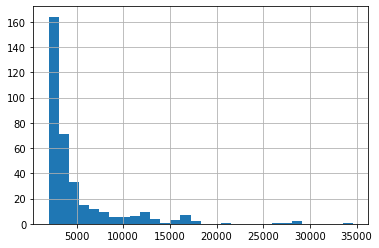

In [49]:
df['one_hand_capital'].hist(bins=30)

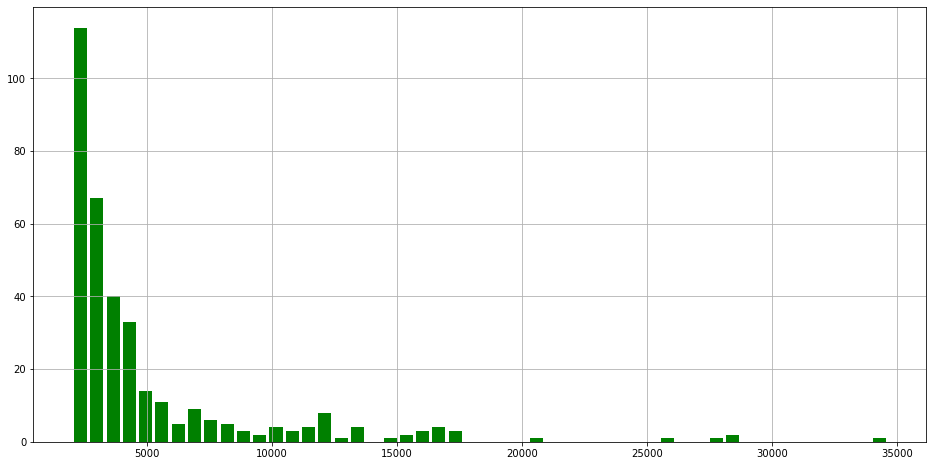

In [66]:
plt.figure(figsize=(16,8))
plt.hist(df['one_hand_capital'],bins=50,rwidth=0.8,facecolor='green')
# plt.title(u'港股新股一手金额分布')
plt.grid(True)
plt.savefig('hkstock.png')
plt.show()

In [67]:
len(df[df['one_hand_capital']>=10000])

43

In [68]:
42/352

0.11931818181818182